In [2]:
import numpy as np
import tensorflow as tf
    # 데이터 불러오기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) # 텐서로 변환, 높이, 너비, 채널
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

    # 255.0 정규화
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [3]:
# CNN 모델구축
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())  # 3차원 텐서를 1차원 벡터로 변환

cnn.add(Dense(128, activation='relu'))  # 은닉층 개념
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))    # 출력층



In [4]:
# CNN 모델 컴파일 및 학습

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
469/469 [==============================] - 54s 114ms/step - loss: 0.6476 - accuracy: 0.8532 - val_loss: 0.0858 - val_accuracy: 0.9727
Epoch 2/30
469/469 [==============================] - 56s 119ms/step - loss: 0.1554 - accuracy: 0.9557 - val_loss: 0.0552 - val_accuracy: 0.9830
Epoch 3/30
469/469 [==============================] - 56s 120ms/step - loss: 0.1087 - accuracy: 0.9684 - val_loss: 0.0395 - val_accuracy: 0.9867
Epoch 4/30
469/469 [==============================] - 58s 123ms/step - loss: 0.0905 - accuracy: 0.9739 - val_loss: 0.0396 - val_accuracy: 0.9869
Epoch 5/30
469/469 [==============================] - 62s 131ms/step - loss: 0.0752 - accuracy: 0.9769 - val_loss: 0.0410 - val_accuracy: 0.9871
Epoch 6/30
469/469 [==============================] - 63s 134ms/step - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0380 - val_accuracy: 0.9884
Epoch 7/30
469/469 [==============================] - 63s 134ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0360 - val_ac

In [5]:
cnn.evaluate(x_test, y_test)    # 모델 정확도 평가

313/313 [==============================] - 2s 8ms/step - loss: 0.0443 - accuracy: 0.9926


[0.04427040368318558, 0.9926000237464905]

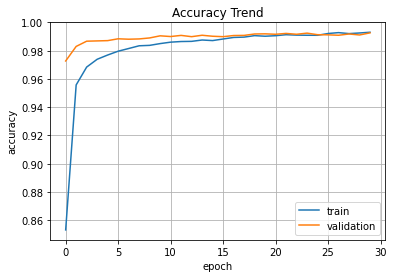

In [6]:
# 정확도 및 손실 1
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.grid()
plt.show()

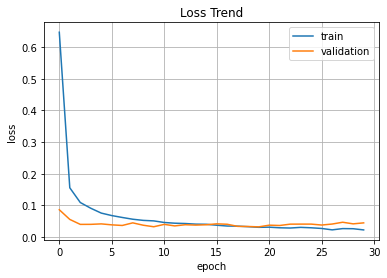

In [7]:
# 정확도 및 손실 2
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.grid()
plt.show()